# Importing Libraries 

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style = "whitegrid")
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)

# Loading Data Into a Data_Frame 

In [2]:
df = pd.read_csv(r"C:\Users\p-c\Downloads\matches.csv") 

# Printing First Five Rows of Data Frame 

In [3]:
df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Overview and Cleaning of Data Frame

In [4]:
print("Shape", df.shape)

Shape (756, 18)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df.drop(columns=['umpire3'], inplace = True)

In [8]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# Season-Wise-Analysis

## a) Number of Matches per Season 

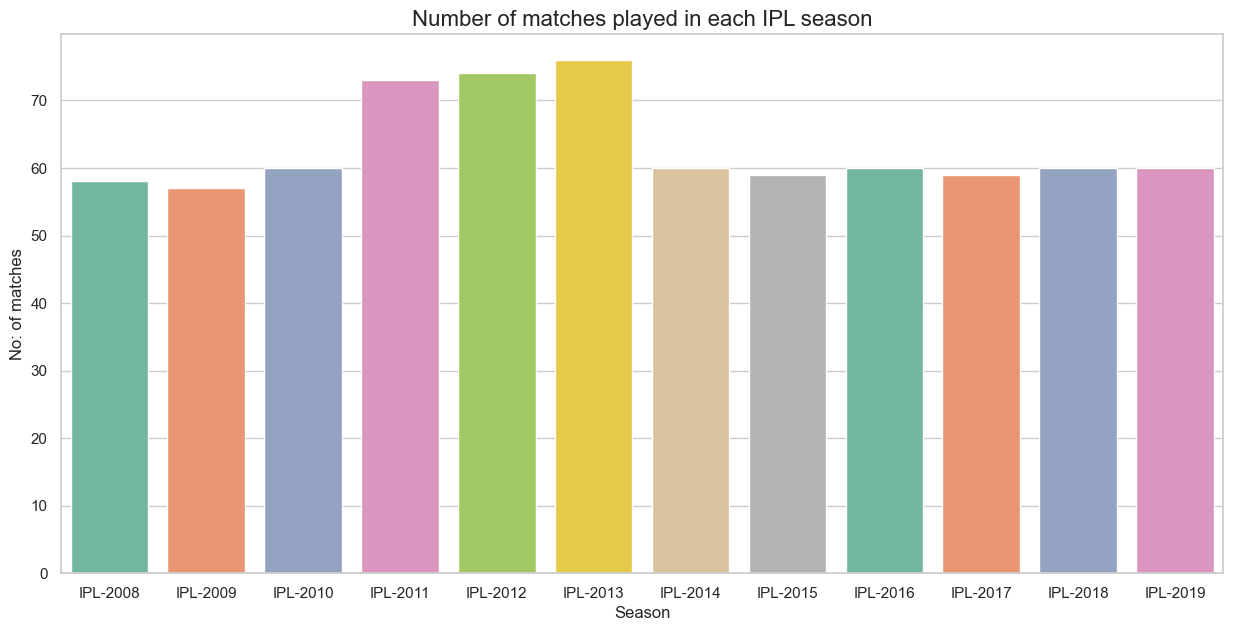

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=df,
              order = df['Season'].value_counts().index.sort_values(),
              palette = 'Set2'
              
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)
plt.show()

The most Matches were played in IPL-2013 Season 

## b) Number of Teames per Season 

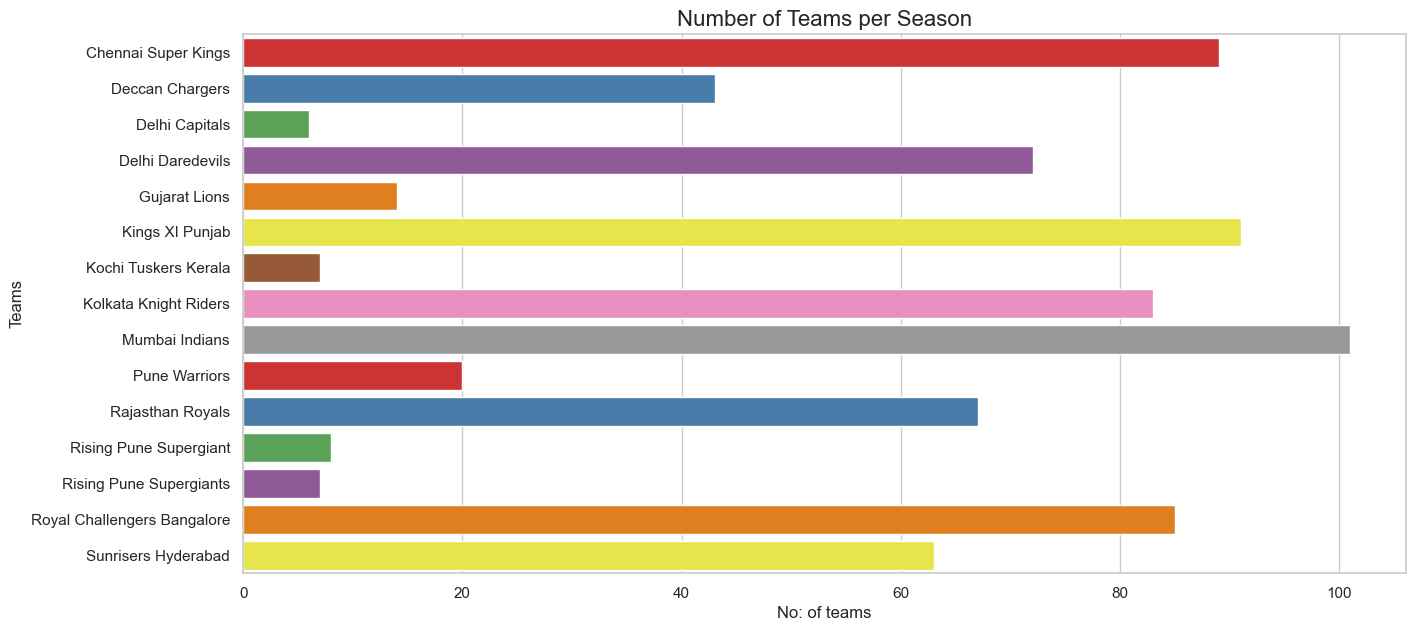

In [10]:
plt.figure(figsize=(15,7))
sns.countplot(y='team1',
              data=df,
              order = df['team1'].value_counts().index.sort_values(),
              palette = 'Set1'
              
              )
plt.ylabel('Teams',fontsize=12)
plt.xlabel('No: of teams',fontsize=12)
plt.title('Number of Teams per Season',fontsize=16)
plt.show()

15 Teams were Played in IPL Season 2008 to 2019, where Mumbai Indians are actively participated in all Seasons. 

# Matches-Wise-Analysis

## a) Matches Won by the Teams

Text(0.5, 1.0, 'Matches won by the Teams')

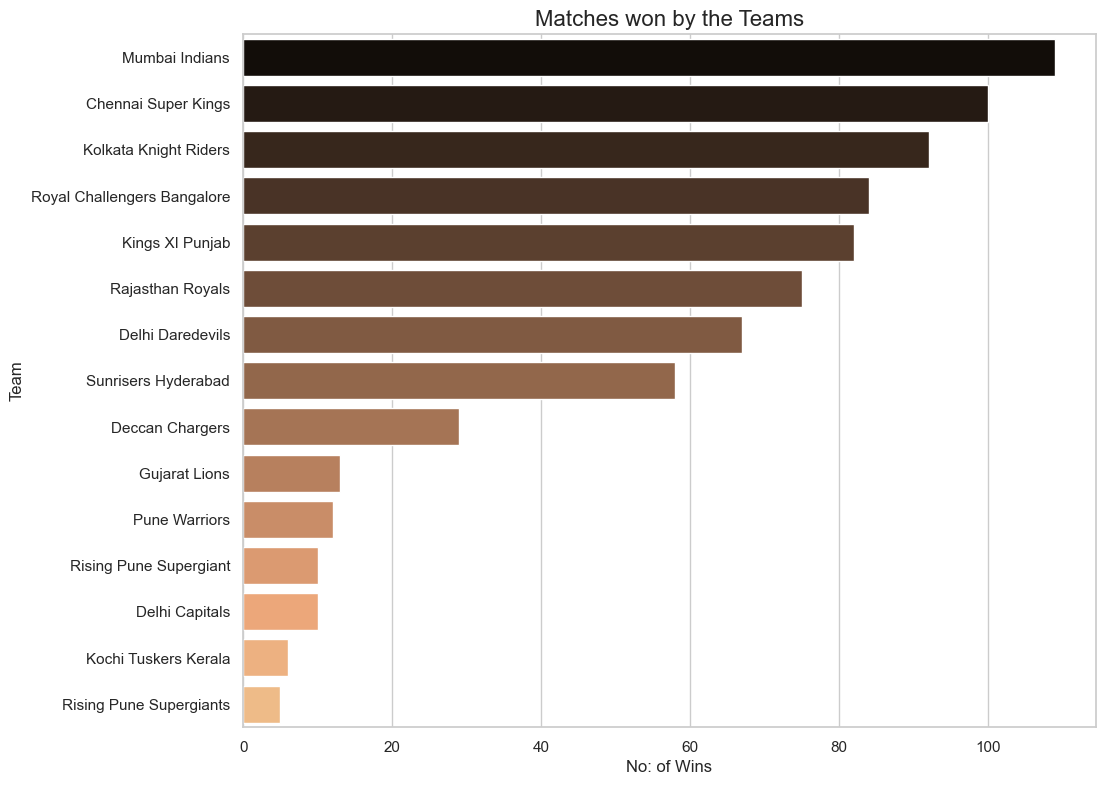

In [11]:
plt.figure(figsize = (11,9))
sns.countplot(y = 'winner',
              data = df,
              order= df['winner'].value_counts().index,
              palette = 'copper' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

Mumbai Indians won most number of matches followed by Chennai Super Kings

## b) No. of Matches Played in Stadium (Top 10)

Text(0.5, 1.0, 'Number of matches played in each Stadium')

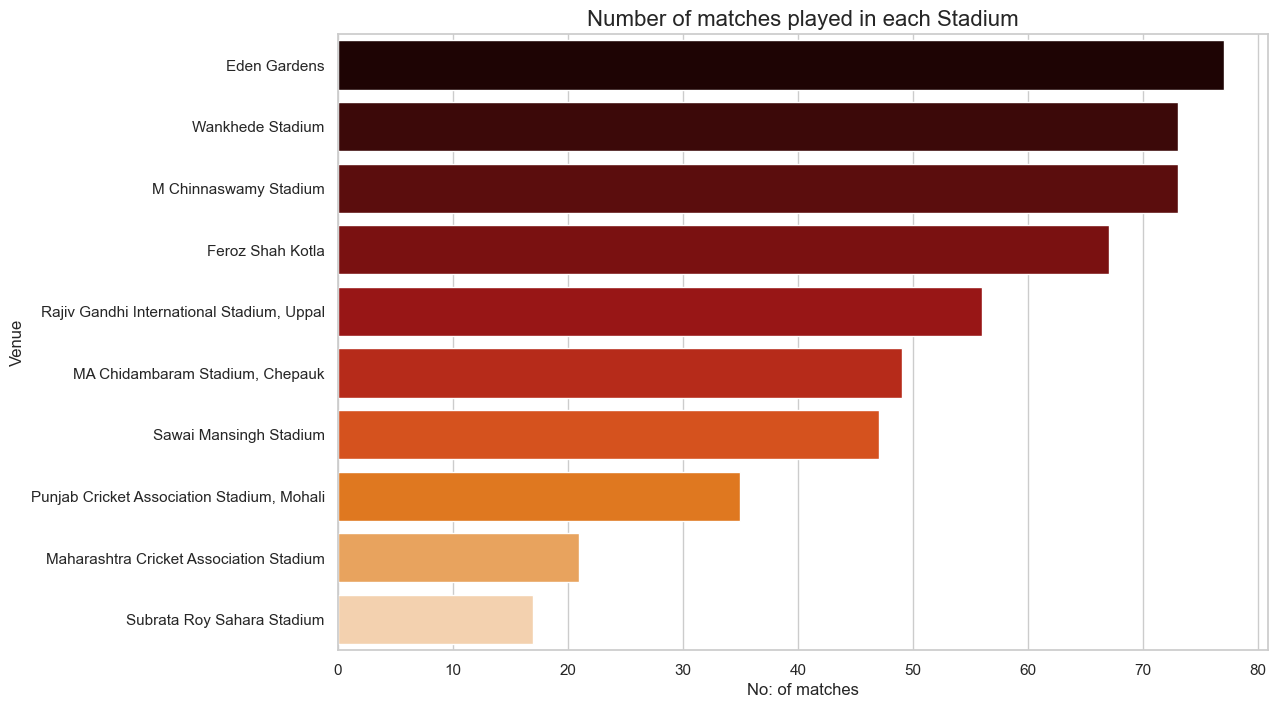

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(y = 'venue',
              data = df,
              order = df['venue'].value_counts().iloc[:10].index,
              palette='gist_heat')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Number of matches played in each Stadium',fontsize=16)

# Toss Analysis

## a) Toss win count by Team.

<Axes: title={'center': 'Toss Wines by Team'}, xlabel='toss_winner'>

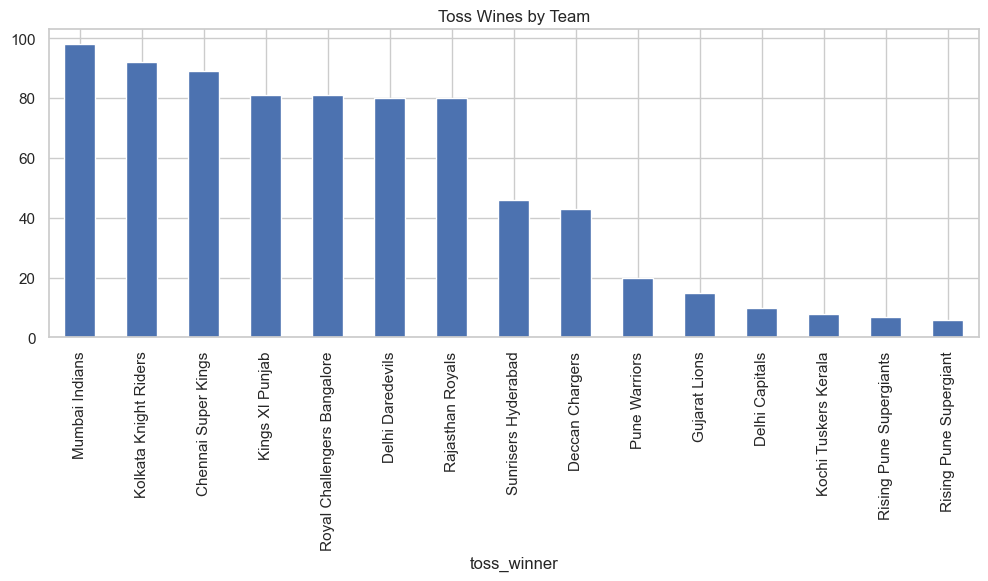

In [13]:
df['toss_winner'].value_counts().plot(kind = 'bar', title = "Toss Wines by Team", figsize = (12, 4))

The most toss won by Team Mumbai Indins followed by Kolkata Knight Riders

## b) Toss decision trend over Seasons.

Text(0.5, 1.0, 'Toss Decisions Over Seasons')

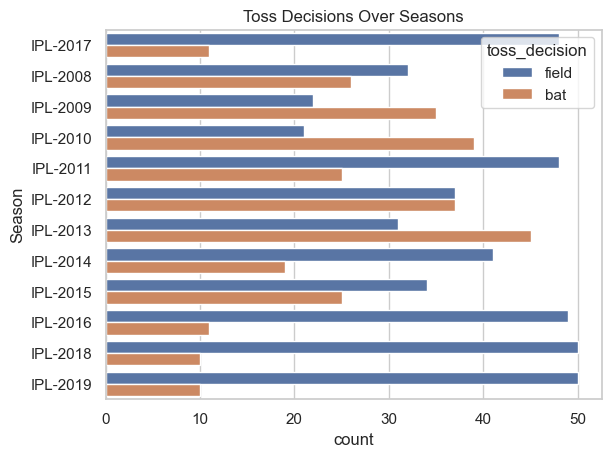

In [14]:
sns.countplot(data = df, y = 'Season', hue = 'toss_decision')
plt.title("Toss Decisions Over Seasons")

We can see a trend that, decisions to field are more from IPL-2018 Season and 2018 Season.

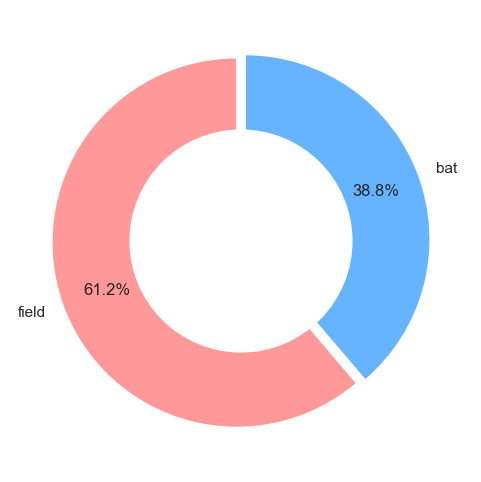

In [15]:
plt.figure(figsize=(6,6))
sizes = df.toss_decision.value_counts()
labels = df.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In more than 61% of matches, teams chose to field after winning the toss.

# Match Outcome Analysis 

## a) Match wins by Team

<Axes: title={'center': 'Total Matches Won'}, xlabel='winner'>

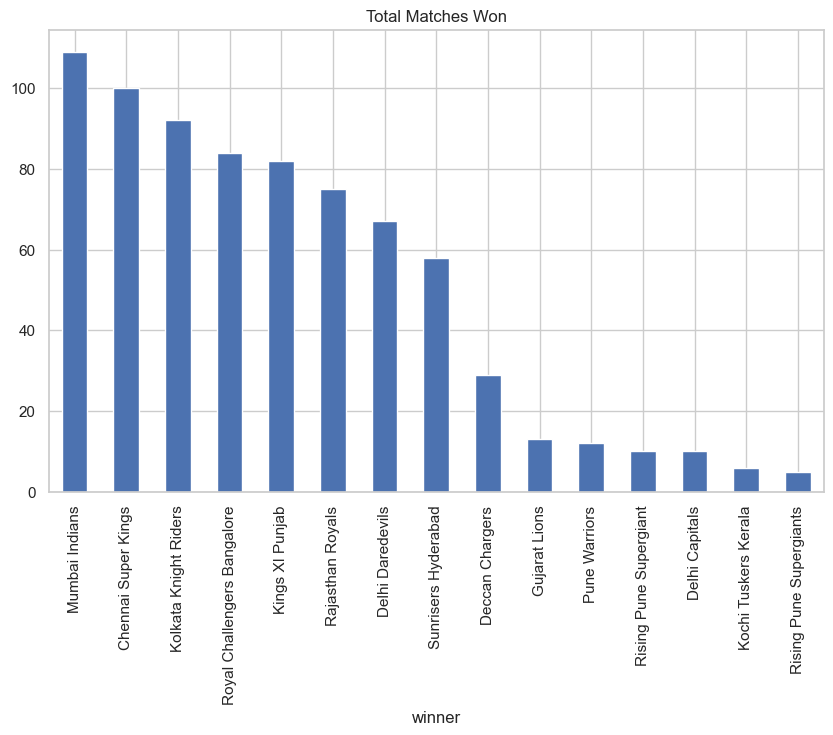

In [16]:
df['winner'].value_counts().plot(kind = 'bar', figsize = (10, 6), title = 'Total Matches Won')

Mumbai Indians is the most wining Team followed by Chaennai Super Kings in  every Season. 

## b) Batting first vs second wins 

Text(0.5, 1.0, 'Wins by Bat First vs Chase')

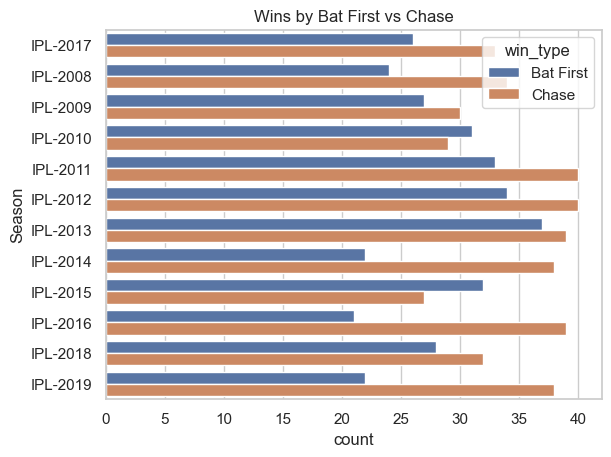

In [17]:
df['win_type'] = np.where(df['win_by_runs'] > 0, 'Bat First', 'Chase')
sns.countplot(data = df, y = 'Season', hue = 'win_type')
plt.title("Wins by Bat First vs Chase")

In IPL Season 2011 and Season 2012 Team with chase won most matches then Bat First.

# Margin of Victory 

## a) Distribution of win margins 

Text(0.5, 1.0, 'Win by Wickets')

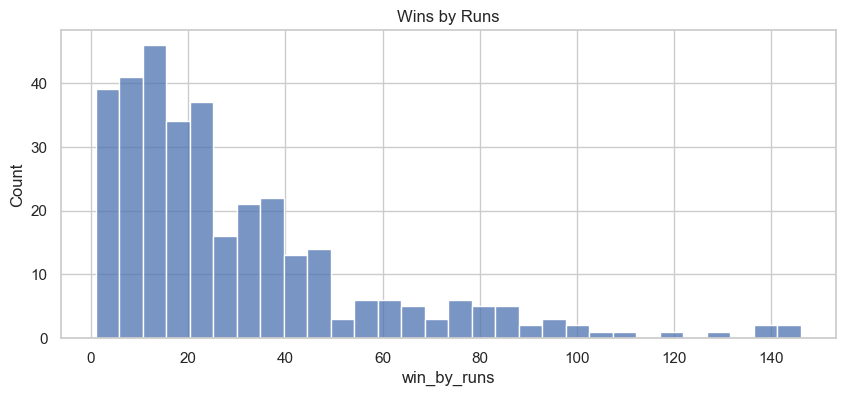

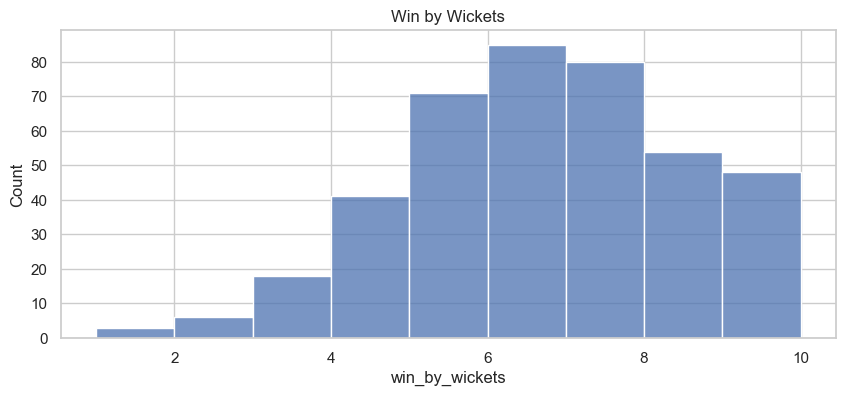

In [18]:
plt.figure(figsize = (10, 4))
sns.histplot(df['win_by_runs']
             [df['win_by_runs'] > 0], bins = 30)
plt.title("Wins by Runs")

plt.figure(figsize = (10, 4))
sns.histplot(df['win_by_wickets']
             [df['win_by_wickets'] > 0], bins = 9,)
plt.title("Win by Wickets")

The max count of win by runs is >40 and the max count of win by wickets are >80.
It shows that wining rate of matches are more in wickets 

# Top Players 

## a) Most player of the match awards

<Axes: title={'center': 'Top 10 Match Winners'}, xlabel='player_of_match'>

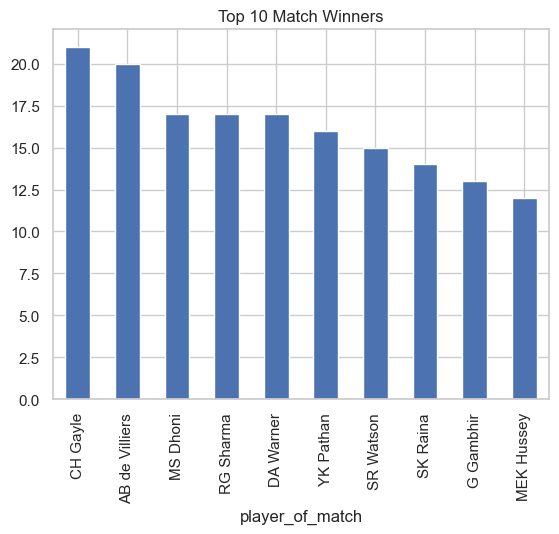

In [19]:
df['player_of_match'].value_counts().head(10).plot(kind = 'bar', title = "Top 10 Match Winners")

CH Gayle wins the most awards as man of the match in all IPL Seasons. 

# Vanue and Umpires 

<Axes: title={'center': 'Top Umpires'}, ylabel='venue'>

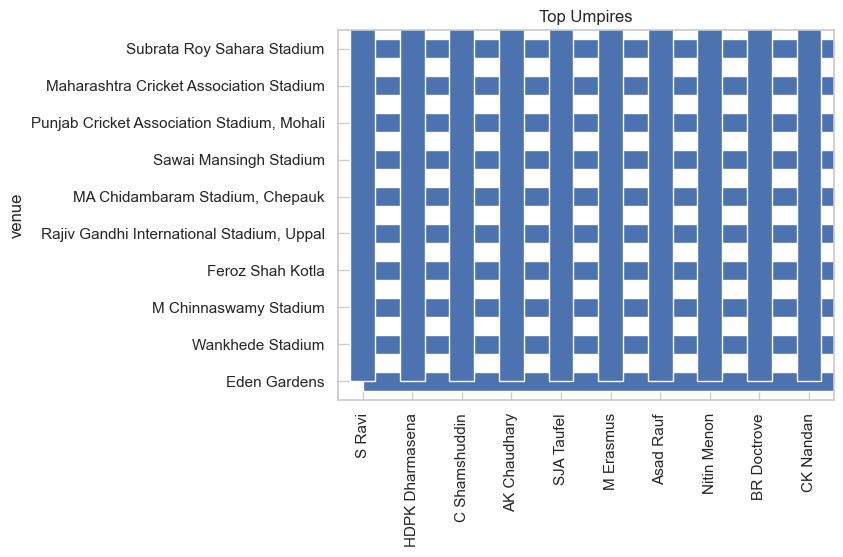

In [20]:
df['venue'].value_counts().head(10).plot(kind = 'barh', title = "Top Venues")
umpires = pd.concat([df['umpire1'],df['umpire2']])
umpires.value_counts().head(10).plot(kind = 'bar', title = "Top Umpires")

The Top Venues are:                                  
 1. Subrata Roy Sahara Stadium
 2. Maharashtra Cricket Assocation Stadium
 3. Panjab Cricket Assocation Stadium, Mohali
 4. Sawai Mansingh Stadium
 5. MA Chidambaram Stadium, Chepauk
 6. Rajiv Gandhi International Stadium, Uppal
 7. Feroz Shah Kotla
 8. M Chinnaswamy Stadium
 9. Wankhede Stadium   
 10. Eden Gardens

The Top Umpires are:
1. S Ravi
2. HDPK Dharmasena
3. C Shamshuddin
4. AK Chaudhary
5. SJA Taufel
6. M Erasmus
7. Asad Rauf
8. Nitin Manon
9. BR Doctrove
10. CK Nandan
 

In [21]:
df.to_csv("ipl_cleaned_2008_2019.csv", index = False)

# Summary 

The above Analysis mainly focused on Cleaning all the dirty data in the csv file. Then it bring an idea of number of Seasons occoured in the time between 2008 - 2019. 
It give the Analysis of number of teams in each season and number of matches they played. 
It give a graphical representation of Matches won by teams in each season.
Gives an idea of maximum matches played in which stadium. 
